In [2]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
%matplotlib inline

#http://data.un.org/Explorer.aspx
# Create a DataFrame using pandas read_csv()
df = pd.read_csv('C:\\Users\\ryan\Desktop\\Thinkful DS Sample Data - Prep Course\\Sample Data\\UNdata_Export_20170201_062423700.csv')

In [4]:
# Take a quick look at the data structure
df.head()

,Country or Area,Year,Value
0,Australia,2013,398527.893789
1,Australia,2012,405836.381314
2,Australia,2011,404866.332124
3,Australia,2010,404773.911567
4,Australia,2009,407013.346259


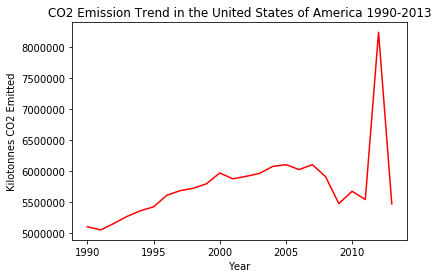

In [7]:
# Isolate USA and plot CO2 emissions over time (1990-2013)
df2 = df.ix[lambda df2: df['Country or Area'] == 'United States of America', :]
plt.plot(df2['Year'], df2['Value'], color = 'red')
plt.xlabel('Year')
plt.ylabel('Kilotonnes CO2 Emitted')
plt.title('CO2 Emission Trend in the United States of America 1990-2013')
plt.show()
#The data shows a gradually increasing trend before 2008-2009, when the US (and the rest of the world) went into 
#a recession, which likely drove the drop from 2008-2011 (although I would need more data to test this hypothesis. 
#There was an enormous spike in 2012 before coming back down in 2013. I suspect this could be an issue with the source
#data itself, but as there is no way to confirm, I will treat the data as though it is accurate. 

In [8]:
# Find minimum and maximum years of data by country
print(df.groupby('Country or Area').min())
print(df.groupby('Country or Area').max())

                          Year         Value
Country or Area                             
Australia                 1990  2.782203e+05
Austria                   1990  6.031147e+04
Belarus                   1990  5.234703e+04
Belgium                   1990  1.012611e+05
Bulgaria                  1990  4.275577e+04
Canada                    1990  4.534982e+05
Croatia                   1990  1.670604e+04
Cyprus                    1990  4.673084e+03
Czech Republic            1990  1.060671e+05
Denmark                   1990  4.110050e+04
Estonia                   1990  1.415359e+04
European Union            1990  3.649699e+06
Finland                   1990  5.107784e+04
France                    1990  3.679212e+05
Germany                   1990  7.891066e+05
Greece                    1990  8.291742e+04
Hungary                   1990  4.388792e+04
Iceland                   1990  2.041995e+03
Ireland                   1990  3.274245e+04
Italy                     1990  3.604227e+05
Japan     

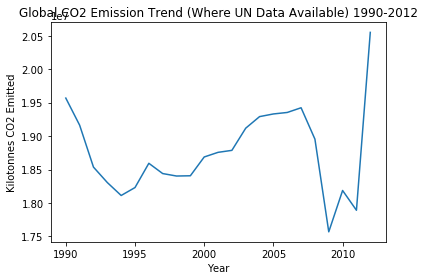

In [15]:
# Some countries only have data through 2012. Hence I will exclude 2013 for consistency.
df3 = df.ix[lambda df3: df['Year'] <= 2012, :]
# Aggregate all countries included in the dataset and plot.
df4 = df3.groupby('Year').sum()
plt.plot(df4['Value'])
plt.xlabel('Year')
plt.ylabel('Kilotonnes CO2 Emitted')
plt.title('Global CO2 Emission Trend (Where UN Data Available) 1990-2012')
plt.tight_layout()
plt.show()
#Interestingly, global CO2 emissions decreased between 1990-1995, despite the US increasing emissions during that time. 
#Just as we saw above with the US trended emissions data, there is a global drop in emissions from 2008-2011 before a sharp
#uptick in 2012. This is likely driven by the US (and trading partners') housing crisis which led to a global recession. I do
#not have sufficient data in this dataset to test this hypothesis, however.

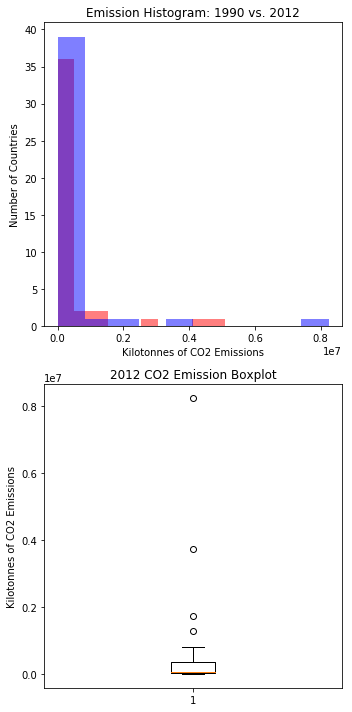

In [18]:
# Compare aggregate CO2 distributions of 1990 with 2012.
df5 = df.ix[lambda df: df['Year'] == 1990, :]
df6 = df.ix[lambda df: df['Year'] == 2012, :]
plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.hist(df5['Value'], color = 'red', alpha = 0.5)
plt.hist(df6['Value'], color = 'blue', alpha = 0.5)
plt.ylabel('Number of Countries')
plt.xlabel('Kilotonnes of CO2 Emissions')
plt.title('Emission Histogram: 1990 vs. 2012')
# Show a box-plot of the CO2 emissions for 2012
x = df6['Value']
# Convert column to row array for use in boxplot() function
x_transpose = []
for val in x:
    x_transpose.append(val)
plt.subplot(2,1,2)
plt.boxplot(x_transpose)
plt.ylabel('Kilotonnes of CO2 Emissions')
plt.title('2012 CO2 Emission Boxplot')
plt.tight_layout()
plt.show()
#The histogram shows how the distribution of emissions has changed from 1990 (in red), our starting period, to 2012, 
#our ending period (in blue).

#The box-plot just shows data from 2012. It provides similar information as the histogram, showing that the dataset has several
#significant outlier data points (with the furthest outlier being the United States). Unfortunately for both of these charts,
#the bulk of the countries with data have very low emissions compared to the outliers (orders of magnitude lower), 
#which results in charts that are not very visually appealing or informative.